# Capture and treatment of satellite images

In this notebook we will see how to use the module *tiff_downloader* to capture and processing of satellite images in an easy and convenient way. First we import the module and call the function *about*, first with the input 'sources', and them with the input 'options'. This function shows the relevant information about all the sources available (there will be more soon) and all options we have at our disposal.

In [1]:
import tiff_downloader as td
import matplotlib.pyplot as plt
import rasterio

In [2]:
td.about('sources')

LandDAAC-v5-day
---------------
Day LST from USGS LandDAAC MODIS 1km 8day version_005 Terra SSA: Day and Night Land Surface Temperature of Southern South America.
Time: grid: /T (days since 2003-01-01) ordered [ (5-12 Mar 2000) (13-20 Mar 2000) (21-28 Mar 2000) ... (22-29 Mar 2017)] N= 785 pts :grid
Longitude: grid: /X (degree_east) ordered (77.99467W) to (40.002W) by 0.01064817 N= 3569 pts :grid
Latitude: grid: /Y (degree_north) ordered (20.00532S) to (56.99707S) by 0.01064817 N= 3475 pts :grid
Link: https://iridl.ldeo.columbia.edu/SOURCES/.USGS/.LandDAAC/.MODIS/.1km/.8day/.version_005/.Terra/.SSA/.Day/.LST/

LandDAAC-v5-night
-----------------
Night LST from USGS LandDAAC MODIS 1km 8day version_005 Terra SSA: Day and Night Land Surface Temperature of Southern South America.
Time: grid: /T (days since 2003-01-01) ordered [ (5-12 Mar 2000) (13-20 Mar 2000) (21-28 Mar 2000) ... (22-29 Mar 2017)] N= 785 pts :grid
Longitude: grid: /X (degree_east) ordered (77.99467W) to (40.002W) by 0.010

In [3]:
td.about('options')

cmap (string)
-------------
The name of the colormap to use when plotting images. Default is `jet`.

regrid (list)
-------------
When downloading the images you also have the option to make a downsampling or upsampling over all the images and download these new pack of images. You should pass a list of two items. The first is a positive float, the ratio of the regrid. For example, if the original image is 120x120 and regrid[0] = 2, them the program will create a image of shape 240x240. The second is the method of the resampling, which can be `nearest`, `average`, `bilinear`, `cubic`, `cubic_spline`, `mode`, `lanczos`, `max`, `min`,`q1` and `q3`.
Link: https://github.com/mapbox/rasterio/blob/master/rasterio/enums.py#L28

plot (bool)
-----------
When this option is set to True the program plots each one of the images downloaded. At the moment this only works when some regrid is done. Default is False.

keep_original (bool)
--------------------
When this option is set to True (default) th

# Examples

The main function of this module is called *download_tiffs*, which has the following parameters: 

                    source, date1, date2, point1, point2, path, opt
                    
*source* can be any one of the title names mentioned when we called *about* with 'sources' as input. For example 'LandDAAC-v5-day' is a valid source parameter. *date1* and *date2* are the initial date and final date we are interested in. If the source gets images in a frequence of 8 days, then the program will download all images following this frequence and between *date1* and *date2*. Now let's see the space coordinates. *point1* is a tuple (x, y), corresponding to the upper left point of the image, while *point2* corresponds to the lower right point. Finally, *opt* is a keyword and it is a class with all optional variables of interest. These variables are the ones described when we called *about* with 'options' as input. In nothing is passed to *opt*, then the program just download the images in their original format. 

Below we show a example passing the option 'regris' to get a bigger size (3 times bigger in each dimension), using the cubic method and plotting the images on the screen. We choose to download all images from LandDAAC-v5-night, from 2016-may-1 to 31-may-2016-may-31.

**Attention:** before making new downloads, you must remove the previous downloaded files to another folder, otherwise they will be overwritten.

Download (2016-05-01) (2016-05-09):success


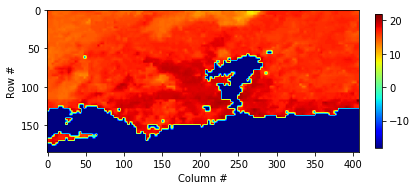

Download (2016-05-09) (2016-05-17):success


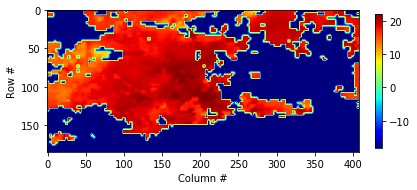

Download (2016-05-17) (2016-05-25):success


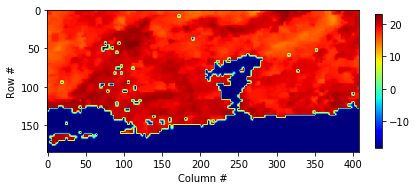

In [4]:
source = 'LandDAAC-v5-night'
date1 = ['2016', '05', '01']
date2 = ['2016', '05', '31']
point1 = (-44.01104, -23.1343)
point2 = (-42.58418, -22.49167)
path = '/home/felipe/PycharmProjects/satelite'

options = {'regrid':[3, 'bilinear'], 'plot':True}
    
td.download_tiffs(source, date1, date2, point1, point2, path, opt=options)

Now we download again in the same time interval but using the option *box_interval*. This option averages the images over three units of time (in this case each unit is 8 days). The other options will remain the same. 

Just to have an idea of the differences between the original image and the treated image, below we show a bigger plot of both for the date 01-05-2016. The files with 'new_' at the beggining are the treated images, whereas the others are the originals.

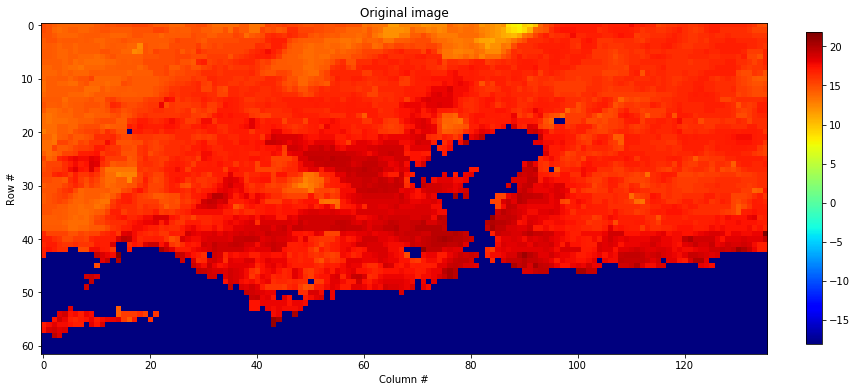

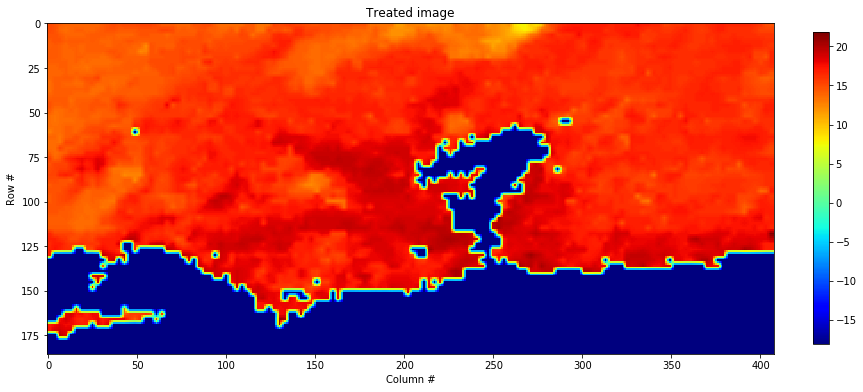

In [5]:
with rasterio.open(path + '/' + '2016-05-01.tiff') as dataset:
    plt.figure(figsize = [14,16])
    original_array = dataset.read()
    plt.imshow(original_array[0,:,:], cmap='jet')
    plt.colorbar(fraction=0.02)
    plt.title('Original image')
    plt.xlabel('Column #')
    plt.ylabel('Row #')
    plt.show()
    
with rasterio.open(path + '/' + 'new_2016-05-01.tiff') as new_dataset:
    plt.figure(figsize = [14,16])
    new_array = new_dataset.read()
    plt.imshow(new_array[0,:,:], cmap='jet')
    plt.colorbar(fraction=0.02)
    plt.title('Treated image')
    plt.xlabel('Column #')
    plt.ylabel('Row #')
    plt.show()

If necessary we can also make downsamplings, just change the of the regrid option to a value between 0 and 1. 

Download (2016-05-01) (2016-05-09):success


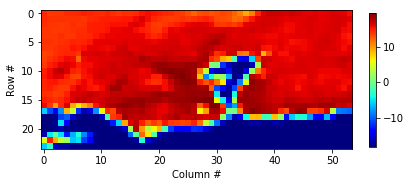

Download (2016-05-09) (2016-05-17):success


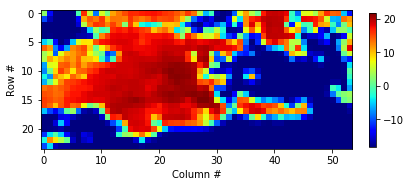

Download (2016-05-17) (2016-05-25):success


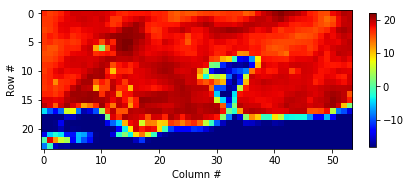

In [6]:
options = {'regrid':[0.4, 'bilinear'], 'plot':True}
    
td.download_tiffs(source, date1, date2, point1, point2, path, opt=options)

# Additional features

**1)** The colormap can be passed as an option inside the class of options. It must be a string with a valid colormap name. 

**2)** Sometimes you don't need to save the original files, only the treated ones. Instead of downloading them and deleting manually, you can just set the option *keep_original* to False. This parameter is part of the class *options*. 

**3)** After all downloads are completed, it may be interesting to use some tool (here we use Geoviews) to interact with the time series. This is possible when the option *time_series* is set to True. This option also turns *keep_original* to False automatically. This is necessary since the function responsible for creating the time series must read all the tiff files in the corresponding folder so, in addition, to use this feature the current folder must be free of any other tiff files.

**4)** Maybe you want to visualize the time series of some data already in your computer. The default filename to be read by the program is *time_series.nc*. The function responsible for visualizing time series is called *view_time_series*, and you only need to pass the file name as argument. 

**5)** Plot the time series of individual points.

**Attention:** to use interactivity the time interval must be within the same year. Changing the year causes an error.   

Download (2016-05-01) (2016-05-09):success
Download (2016-05-09) (2016-05-17):success
Download (2016-05-17) (2016-05-25):success
Download (2016-05-25) (2016-06-02):success
Download (2016-06-02) (2016-06-10):success
Download (2016-06-10) (2016-06-18):success
Download (2016-06-18) (2016-06-26):success
Download (2016-06-26) (2016-07-04):success
Download (2016-07-04) (2016-07-12):success
Download (2016-07-12) (2016-07-20):success
Download (2016-07-20) (2016-07-28):success
Download (2016-07-28) (2016-08-05):success
Download (2016-08-05) (2016-08-13):success
Download (2016-08-13) (2016-08-21):success
Download (2016-08-21) (2016-08-29):success
Download (2016-08-29) (2016-09-06):success
Download (2016-09-06) (2016-09-14):success
Download (2016-09-14) (2016-09-22):success
Download (2016-09-22) (2016-09-30):success
Download (2016-09-30) (2016-10-08):success
Download (2016-10-08) (2016-10-16):success
Download (2016-10-16) (2016-10-24):success
Download (2016-10-24) (2016-11-01):success
Download (2

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
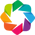

:HoloMap   [band,time]
   :Image   [x,y]   (__xarray_dataarray_variable__)

In [7]:
# Now we download more files to explore with Geoviews.
date1 = ['2016', '05', '01']
date2 = ['2016', '11', '30']

options = {'regrid':[3, 'bilinear'], 'time_series':True, 'cmap':'viridis'}
    
td.download_tiffs(source, date1, date2, point1, point2, path, opt=options)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
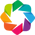

:HoloMap   [band,time]
   :Image   [x,y]   (__xarray_dataarray_variable__)

In [8]:
# Use the function 'view_time_series' to view any time series already downloaded.
td.view_time_series('time_series.nc', cmap='inferno')

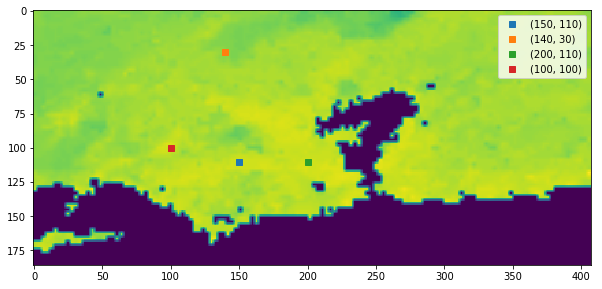

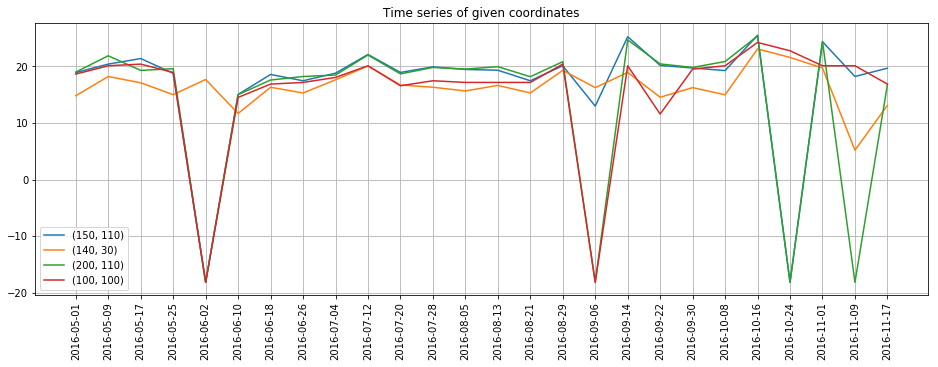

In [9]:
# The follow function plots the time series evolution with respect to some point coordinates. 
# It is possible to pass coordinates in (col, row) format (default) or in spatial coordinates. In the last 
# case set the optional parameter 'spatial_coordinates' to True.
point = [[150, 110], [140, 30], [200, 110], [100, 100]]
info = td.point_time_series(point)